# SC qubits - testing the sc_qubits module

## Initialization (load modules etc.)

In [1]:
%pylab inline

from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import sc_qubits as qubit  # import the superconducting circuit module

Populating the interactive namespace from numpy and matplotlib


## The Transmon and Cooper pair box

$H_\text{CPB}=4E_\text{C}(\hat{n}-n_g)^2+\frac{1}{2}E_\text{J}(|n\rangle\langle n+1|+\text{h.c.})$

In [2]:
CPB = qubit.QubitTransmon(
    EJ = 5.0,
    EC = 1.0,
    ng = 0.0,
    ncut = 30
    )

In [3]:
CPB

QUBIT PARAMETERS -------
EC	: 1.0
EJ	: 5.0
_qubit_type	: Cooper pair box
ncut	: 30
ng	: 0.0


Percent: [====================] 100.0% Done.
Writing graphics and parameters to ./data/CPB_E_vs_ng.pdf and ./data/CPB_E_vs_ng.prm.


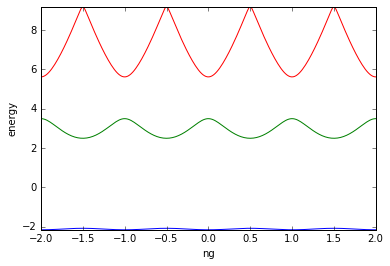

In [4]:
ng_list = np.linspace(-2, 2, 220)
CPB.plot_evals_vs_paramvals('ng', ng_list, evnum=3, subtract_ground=False, to_file="./data/CPB_E_vs_ng")


Percent: [====================] 100.0% Done.


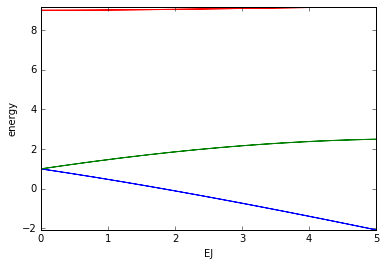

In [5]:
CPB.pm.ng = 0.5
ejvals = CPB.pm.EJ * np.cos(linspace(-pi/2, pi/2, 40))
CPB.plot_evals_vs_paramvals('EJ', ejvals, evnum=3, subtract_ground=False)

## Fluxonium qubit

$H_\text{fl}=-4E_\text{C}\partial_\phi^2-E_\text{J}\cos(\phi-\varphi_\text{ext}) +\frac{1}{2}E_L\phi^2$

In [4]:
fluxonium = qubit.QubitFluxonium(
    EJ = 8.9,
    EC = 2.5,
    EL = 0.5,
    pext = 0.0,
    cutoff = 130
)

In [5]:
fluxonium

QUBIT PARAMETERS -------
EC	: 2.5
EJ	: 8.9
EL	: 0.5
_qubit_type	: fluxonium
cutoff	: 130
pext	: 0.0

In [8]:
fluxonium.eigenvals()

array([ -4.28338463,   4.47506063,   4.69616798,   6.71864972,
        12.64960539,  15.28847499])


Percent: [====================] 100.0% Done.


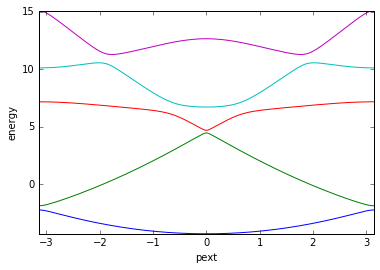

In [9]:
pext_list = np.linspace(-pi, pi, 200)
fluxonium.plot_evals_vs_paramvals('pext', pext_list, evnum=5, subtract_ground=False)


Percent: [====================] 100.0% Done.


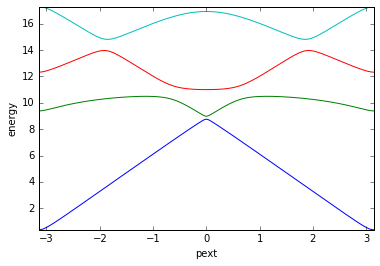

In [10]:
fluxonium.plot_evals_vs_paramvals('pext', pext_list, evnum=5, subtract_ground=True)

## The symmetric $0-\pi$ qubit (no coupling to the $\chi$-mode)

$H_\text{sym}=-2E_\text{CJ}\partial_\phi^2-2E_{\text{C}\Sigma}\partial_\theta^2-2E_\text{J}\cos\theta\cos(\phi-\varphi_\text{ext}/2)+E_L\phi^2+2E_\text{J}$

In [6]:
# parameters for the 0-\pi circuit

EJ_CONST = 1/3.95

zero_pi = qubit.QubitSymZeroPi(
    minmaxpts = [ 
        [-12*pi, 12*pi, 300], # phi variable
        [-pi/2, 3*pi/2, 40]   # theta variable (2pi periodic!)
    ],
    EJ   = EJ_CONST,
    EL   = 10.0**(-3),
    ECJ  = 1/(8.0*EJ_CONST),
    ECS  = 10.0**(-3),
    pext = 0
)    

In [7]:
zero_pi

QUBIT PARAMETERS -------
ECJ	: 0.49375
ECS	: 0.001
EJ	: 0.253164556962
EL	: 0.001
Hdim	: 12000
_qubit_type	: symmetric 0-Pi qubit (zero offset charge)
dim	: 2
minmaxpts	: [[-37.69911184307752, 37.69911184307752, 300], [-1.5707963267948966, 4.71238898038469, 40]]
pext	: 0
varmax	: [37.69911184307752, 4.71238898038469]
varmin	: [-37.69911184307752, -1.5707963267948966]
varpts	: [300, 40]

#### Potential energy for symmetric 0-$\pi$ qubit

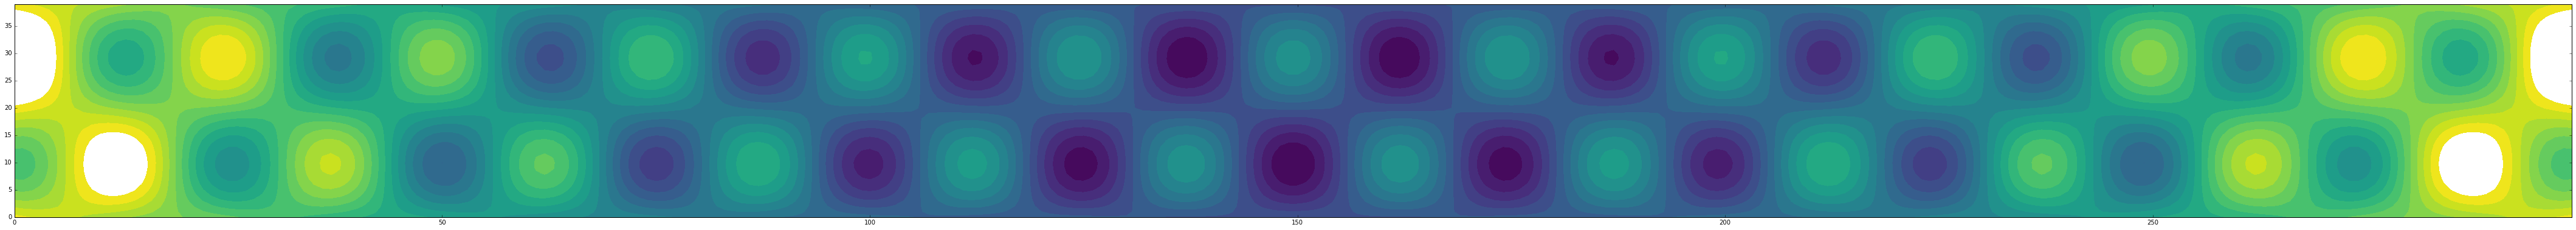

In [8]:
# qubit.contourplot_potential(zero_pi.potential, pm, levls=linspace(0,2,20), to_file="potential.pdf")
qubit.contourplot_potential(zero_pi.potential, zero_pi.pm, levls=linspace(0,2,20))

In [9]:
evals = zero_pi.eigenvals()

In [10]:
evals

array([ 0.42752059,  0.42848074,  0.45609018,  0.45690736,  0.46835442,
        0.4785273 ])


Percent: [====================] 100.0% Done.


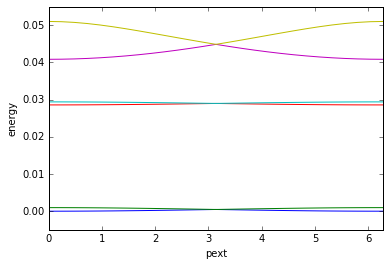

In [7]:
pext_list = np.linspace(0, 2*pi, 27)
zero_pi.plot_evals_vs_paramvals('pext', pext_list, shift=-evals[0], yrange=[-0.005,0.055], to_file="./data/0pi_sym")

In [8]:
evals1,evecs1 = zero_pi.eigensys()

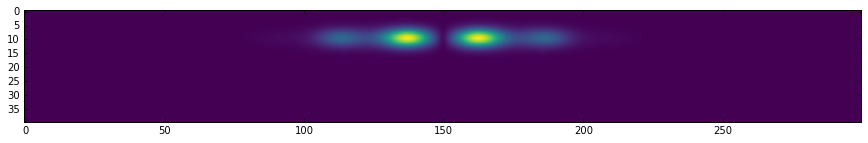

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(abs(evecs1[:,4].reshape(zero_pi.pm.varpts[0],zero_pi.pm.varpts[1])).T,cmap=cm.viridis)
plt.show()

In [12]:
np.linalg.norm(evecs1[:,4])

1.0000000000000207

## The symmetric $0-\pi$ qubit with offset charge (no coupling to the $\chi$-mode)

$H_\text{sym}=-2E_\text{CJ}\partial_\phi^2+2E_{\text{C}\Sigma}(i\partial_\theta-n_g)^2-2E_\text{J}\cos\theta\cos(\phi-\varphi_\text{ext}/2)+E_L\phi^2+2E_\text{J}$

In [17]:
# parameters for the 0-\pi circuit

EJ_CONST = 1/3.95


zero_pi_ng = qubit.QubitSymZeroPiNg(
    minmaxpts = [ 
        [-12*pi, 12*pi, 250], # phi variable
        [-pi/2, 3*pi/2, 50]   # theta variable (2pi periodic!)
    ],
    EJ   = EJ_CONST,
    EL   = 10.0**(-3),
    ECJ  = 1/(8.0*EJ_CONST),
    ECS  = 10.0**(-3),
    pext = 0.25,
    ng   = 4.2
)

In [18]:
evals=zero_pi_ng.eigenvals()

In [19]:
evals

array([ 0.43052483,  0.43146827,  0.46091531,  0.46170672,  0.47152069,
        0.48153677])

Note: the range in $n_g$ that converges is intimately related to the grid spacing along the $\chi$ direction. To appreciate this, remember that wavefunctions for $n_g=0$ and $n_g=1$ are identical except additional phase wrapping for the latter. This phase wrapping becomes faster and faster with $n_g$. (Specifically, the phase factor is $e^{i n_g \chi}$.)


Percent: [====================] 100.0% Done.


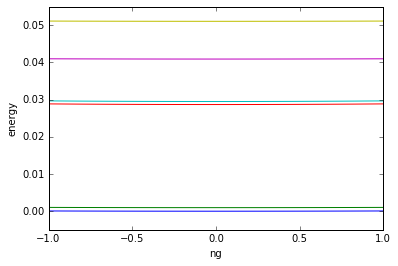

In [20]:
zero_pi_ng.pm.pext = 0.0
zero_pi_ng.pm.ng = 0.0

evals=zero_pi_ng.eigenvals(1)
ng_list = np.linspace(-1, 1, 12)
zero_pi_ng.plot_evals_vs_paramvals('ng', ng_list, shift=-evals[0], yrange=[-0.005,0.055])


In [21]:
zero_pi_ng.pm.ng = 0.355
evals1,evecs1 = zero_pi_ng.eigensys(10)

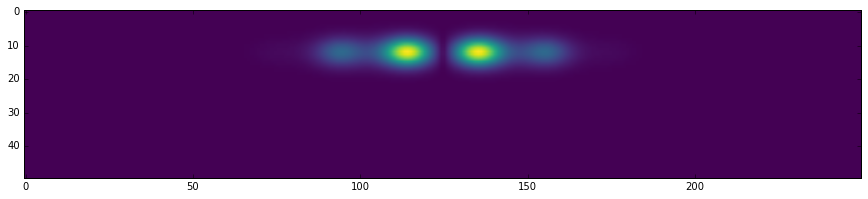

In [22]:
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(abs(evecs1[:,4].reshape(zero_pi_ng.pm.varpts[0],zero_pi_ng.pm.varpts[1])).T,cmap=cm.viridis)
plt.show()

## The modified symmetric $0-\pi$ qubit: substitute inductors by Josephson junctions
(suggestion by Dave, not covered in paper)

$H_\text{mod} = -2E_{C\phi}\partial_\phi^2 -2E_{C\theta}\partial_\theta^2-2E_{C\chi}\partial_\theta^2-2E_J\cos(\theta+\varphi_\text{ext}/2)\cos\phi - 2E_{J}'\cos\chi\cos\phi$

In [23]:
# parameters for the modified 0-\pi circuit


#EJ    = 1/3.95
#EJp   = 10.0**(-3)
#ECphi = 1/(8.0*pm.EJ)
#ECth  = 10.0**(-3)
#ECchi = 10.0**(-3)
#pext = 0

mod_zeropi = qubit.QubitModZeroPi(
    minmaxpts = [ 
        [-pi/2, 3*pi/2, 40], # phi variable (2pi periodic!)
        [-pi/2, 3*pi/2, 40], # theta variable (2pi periodic!)
        [-pi/2, 3*pi/2, 40], # chi variable (2pi periodic!)        
    ],
    EJ    = 1.0,
    EJp   = 1.1,
    ECphi = 1.2,
    ECth  = 1.3,
    ECchi = 1.4,
    pext  = 0.1
)

In [24]:
mod_zeropi

Qubit parameters
ECchi	: 1.4
ECphi	: 1.2
ECth	: 1.3
EJ	: 1.0
EJp	: 1.1
Hdim	: 64000
_qubit_type	: modified symmetric 0-Pi qubit (EL->EJp)
dim	: 3
minmaxpts	: [[-1.5707963267948966, 4.71238898038469, 40], [-1.5707963267948966, 4.71238898038469, 40], [-1.5707963267948966, 4.71238898038469, 40]]
pext	: 0.1
varmax	: [4.71238898038469, 4.71238898038469, 4.71238898038469]
varmin	: [-1.5707963267948966, -1.5707963267948966, -1.5707963267948966]
varpts	: [40, 40, 40]

In [25]:
mod_zeropi.eigenvals(10)

array([ 3.77340045,  5.04567667,  6.48983467,  6.52864504,  6.7520074 ,
        6.82561228,  7.88700006,  7.99414245,  8.1649993 ,  8.37670102])

## The full $0−\pi$ qubit including disorder-induced coupling to χ-mode

$H = H_\text{sym}
+4E_{C\Sigma}(\delta C_J/C_J)\partial_\phi\partial_\theta +2\,\delta E_J \sin\theta\sin(\phi-\phi_\text{ext}/2)\\
\quad-2E_C\partial_\chi^2+E_L \chi^2+4E_{C\Sigma}(\delta C/C)\partial_\theta\partial_\chi+2\,\delta E_L \phi\, \chi$

### With disorder in all quantities

In [2]:
# parameters for the modified 0-\pi circuit
EJ_CONST  = 1/3.95
ECJ_CONST = 1/(8.0*EJ_CONST)
ECS_CONST = 10.0**(-3)

zeropi_full = qubit.QubitFullZeroPi(
    minmaxpts = [ 
        [-7*pi, 7*pi, 65],   # phi variable
        [-pi/2, 3*pi/2, 35], # theta variable (2pi periodic!)
        [-10.0, 10.0, 70]    # chi variable
    ],
    EJ  = EJ_CONST,
    dEJ = 0.05,
    EL  = 10.0**(-3),
    dEL = 0.05,
    ECJ = ECJ_CONST,
    dCJ = 0.05,
    ECS = ECS_CONST,
    EC  = 1/(1/ECS_CONST-1/ECJ_CONST),
    dC  = 0.08,
    pext = 0
)

In [3]:
zeropi_full

Qubit parameters
EC	: 0.00100202942669
ECJ	: 0.49375
ECS	: 0.001
EJ	: 0.253164556962
EL	: 0.001
Hdim	: 159250
_qubit_type	: full 0-Pi circuit (phi, theta, chi) with offset charge
dC	: 0.08
dCJ	: 0.05
dEJ	: 0.05
dEL	: 0.05
dim	: 3
minmaxpts	: [[-21.991148575128552, 21.991148575128552, 65], [-1.5707963267948966, 4.71238898038469, 35], [-10.0, 10.0, 70]]
pext	: 0
varmax	: [21.991148575128552, 4.71238898038469, 10.0]
varmin	: [-21.991148575128552, -1.5707963267948966, -10.0]
varpts	: [65, 35, 70]

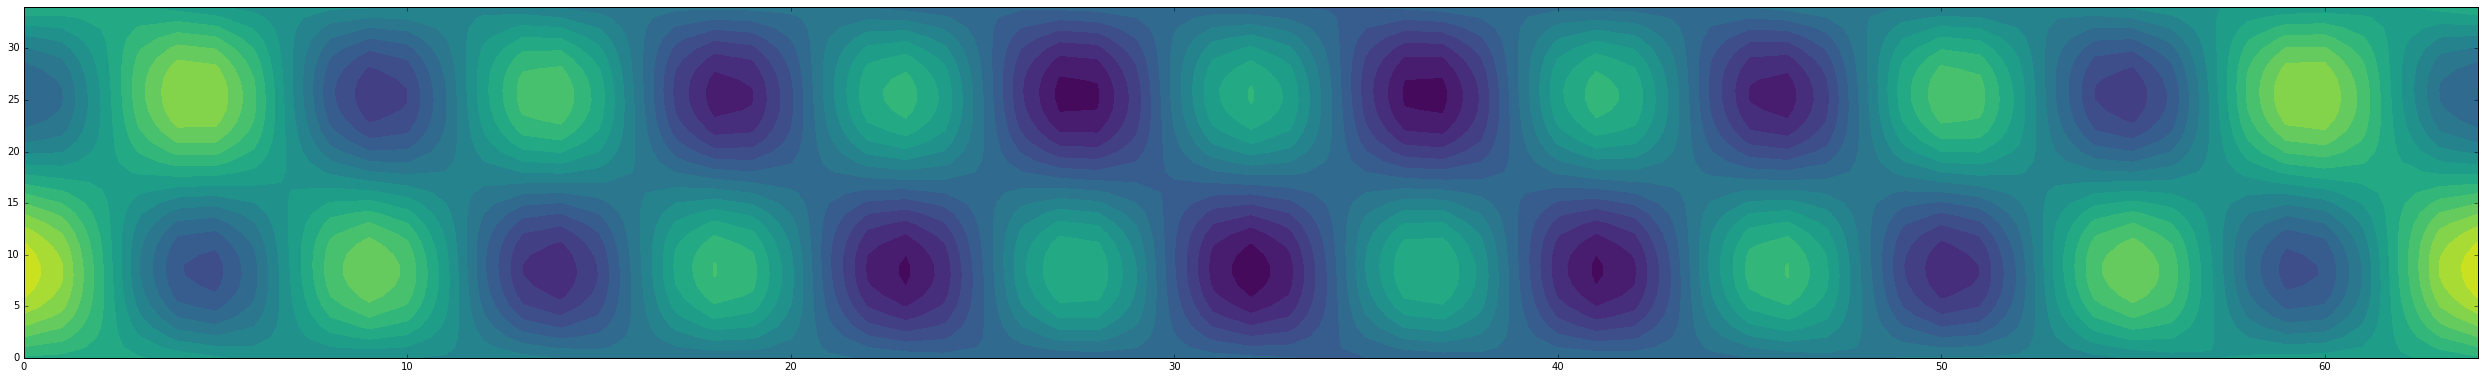

In [4]:
qubit.contourplot_potential(zeropi_full.potential, zeropi_full.pm, levls=linspace(0,1.63,20), varying_vars=[0,1], fixed_vals=[0.0])

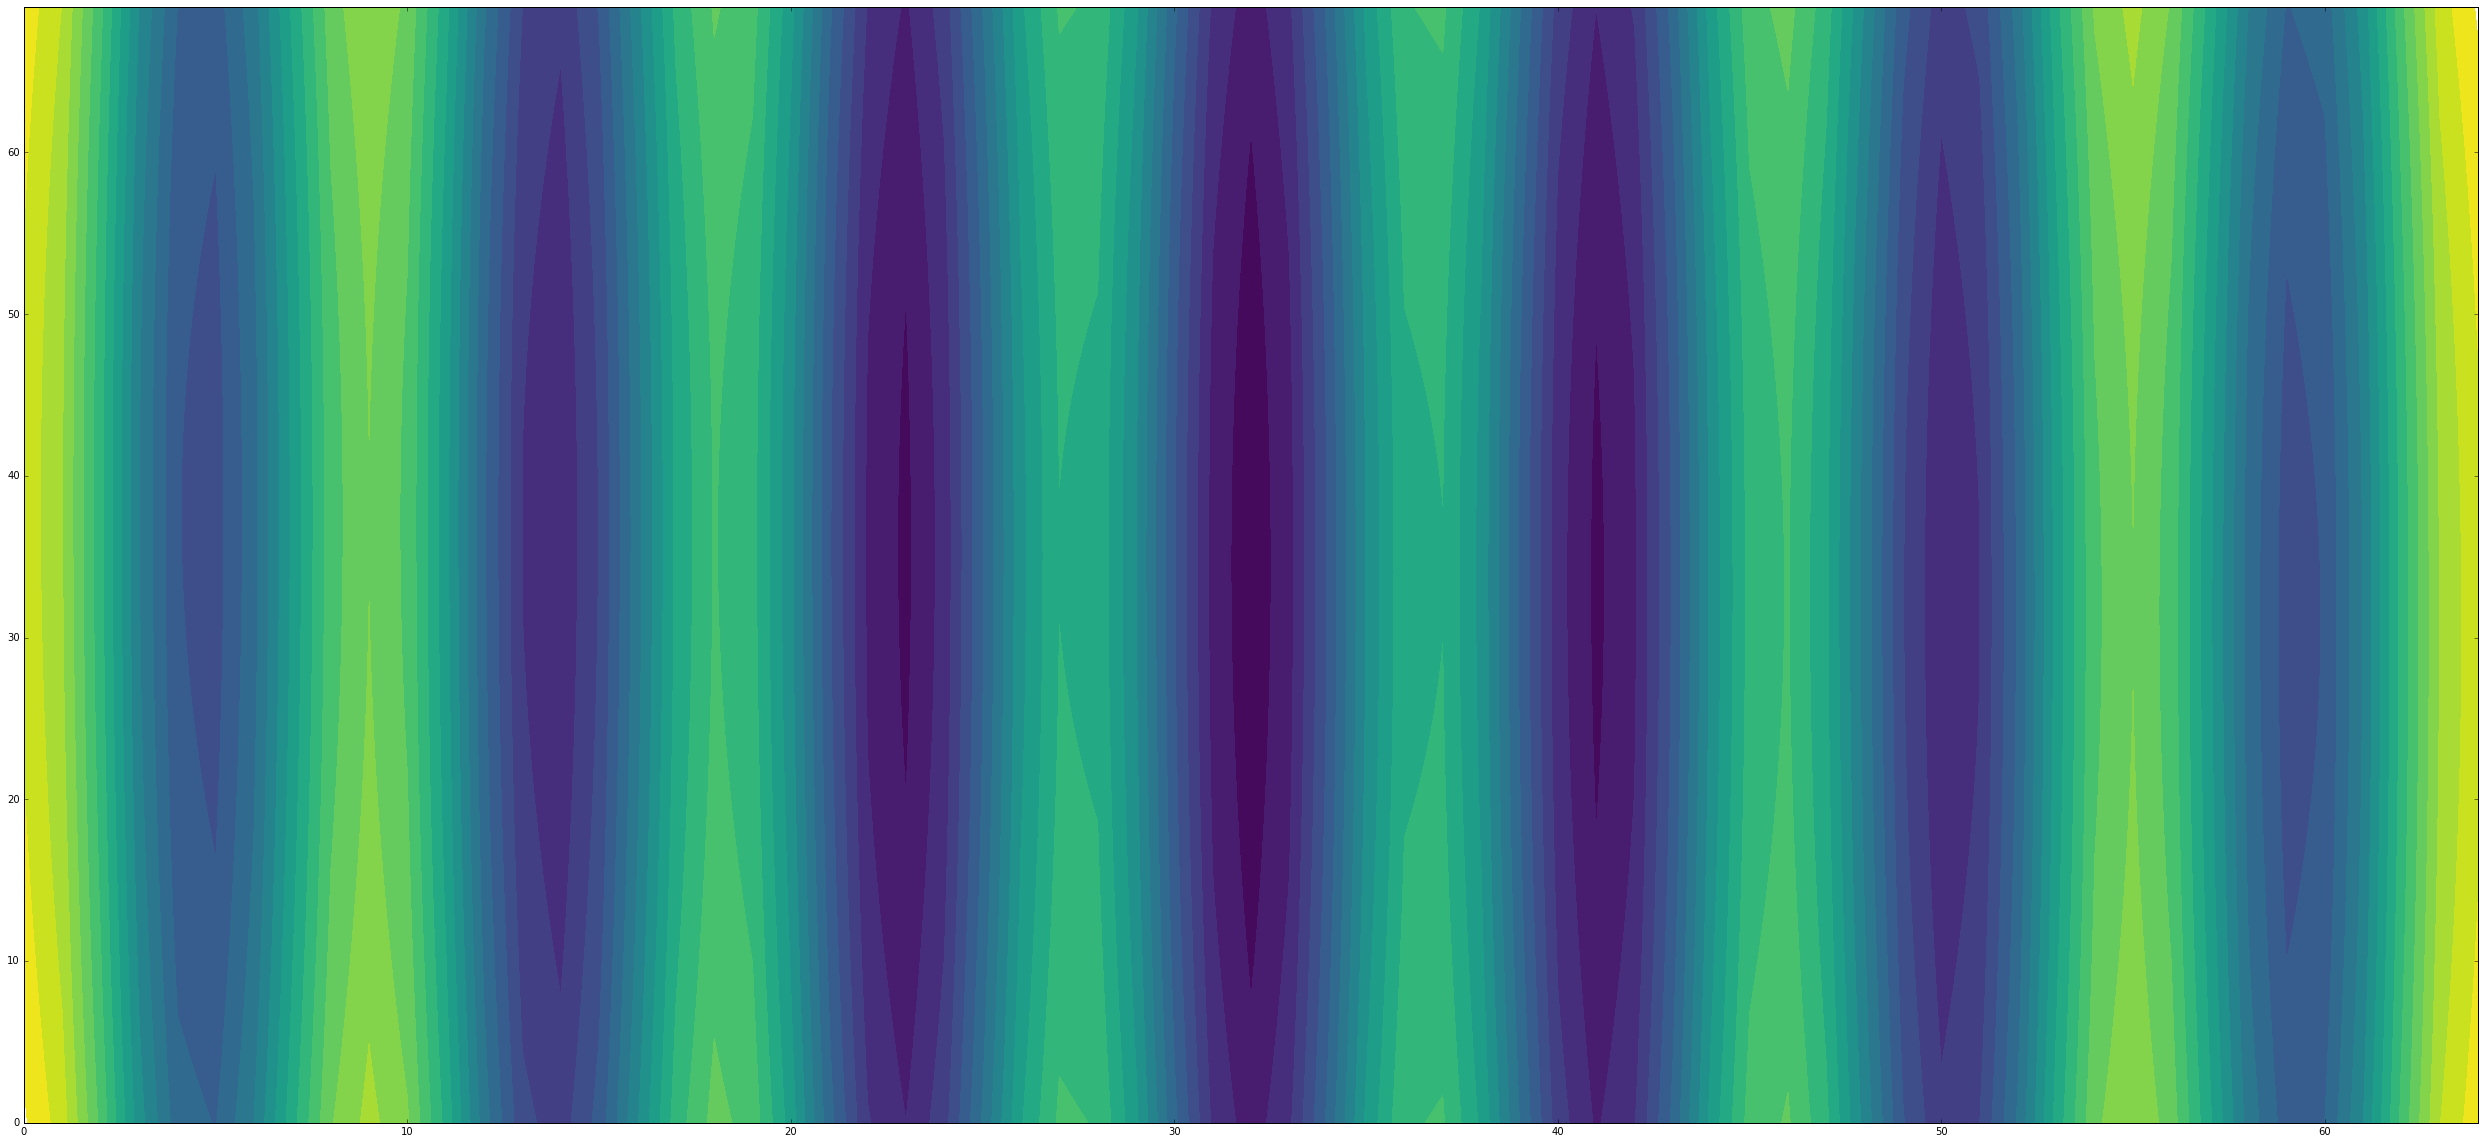

In [5]:
qubit.contourplot_potential(zeropi_full.potential, zeropi_full.pm, levls=linspace(0,1.63,20), varying_vars=[0,2], fixed_vals=[0.0])

In [6]:
ev0 = zeropi_full.eigenvals(evnum=2)

In [7]:
ev0[0]

0.45369675493632883


Percent: [====================] 100.0% Done.


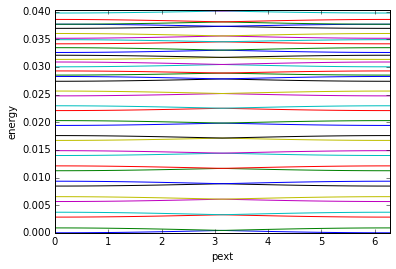

In [38]:
pext_list = np.linspace(0, 2*pi, 27)
zeropi_full.plot_evals_vs_paramvals('pext', pext_list, evnum=40, shift=-ev0[0],to_file="./data/0pifull_E_vs_pext")

In [39]:
evals, evecs = zeropi_full.eigensys(40, to_file="./data/0pi_disordered")

In [40]:
evals

array([ 0.49396812,  0.49347547,  0.49231468,  0.4914508 ,  0.49144852,
        0.49069836,  0.48977108,  0.4889037 ,  0.48865351,  0.48789976,
        0.48720272,  0.4863341 ,  0.48583502,  0.48507994,  0.48461001,
        0.48374012,  0.48299557,  0.48223914,  0.48199335,  0.48112214,
        0.47935309,  0.47848055,  0.4766896 ,  0.47581569,  0.47400321,
        0.47312791,  0.47129424,  0.47041751,  0.46856299,  0.46768481,
        0.46580977,  0.46493011,  0.46303485,  0.46215369,  0.46023851,
        0.45935581,  0.45742101,  0.45653675,  0.45458259,  0.45369675])

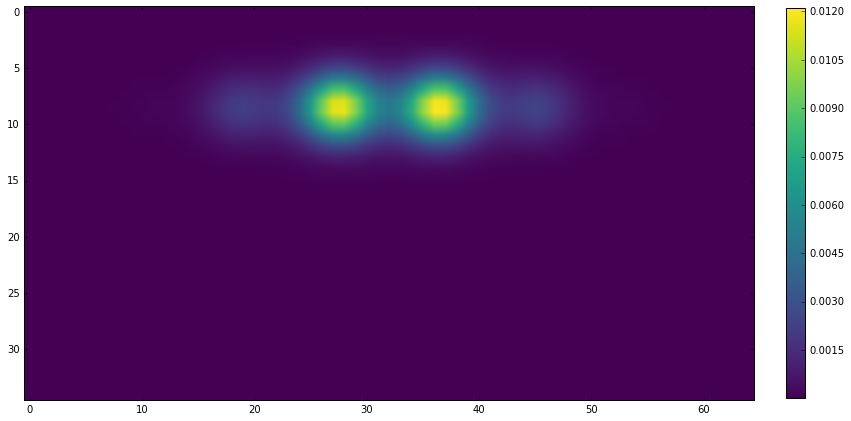

In [41]:
plt.figure(figsize=(14,14))
plt.imshow(abs(evecs[:,1].reshape(zeropi_full.pm.varpts[0],zeropi_full.pm.varpts[1],zeropi_full.pm.varpts[2])[:,:,27]).T,cmap=cm.viridis)
plt.colorbar(fraction=0.025, pad=0.04)
plt.show()

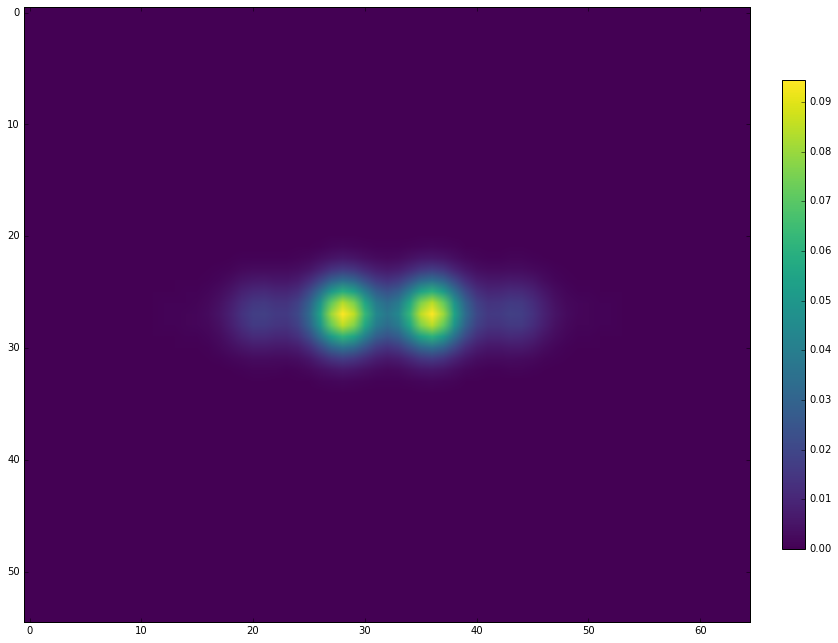

In [35]:
plt.figure(figsize=(14,14))
# plt.imshow((evecs[:,0].reshape(zeropi_full.pm.varpts[0],zeropi_full.pm.varpts[1],zeropi_full.pm.varpts[2])[:,25,:]).T,cmap=cm.viridis)
plt.imshow(abs(evecs[:,1].reshape(zeropi_full.pm.varpts[0],zeropi_full.pm.varpts[1],zeropi_full.pm.varpts[2])[:,8,:]).T,cmap=cm.viridis)
plt.colorbar(fraction=0.03, pad=0.04)
plt.show()

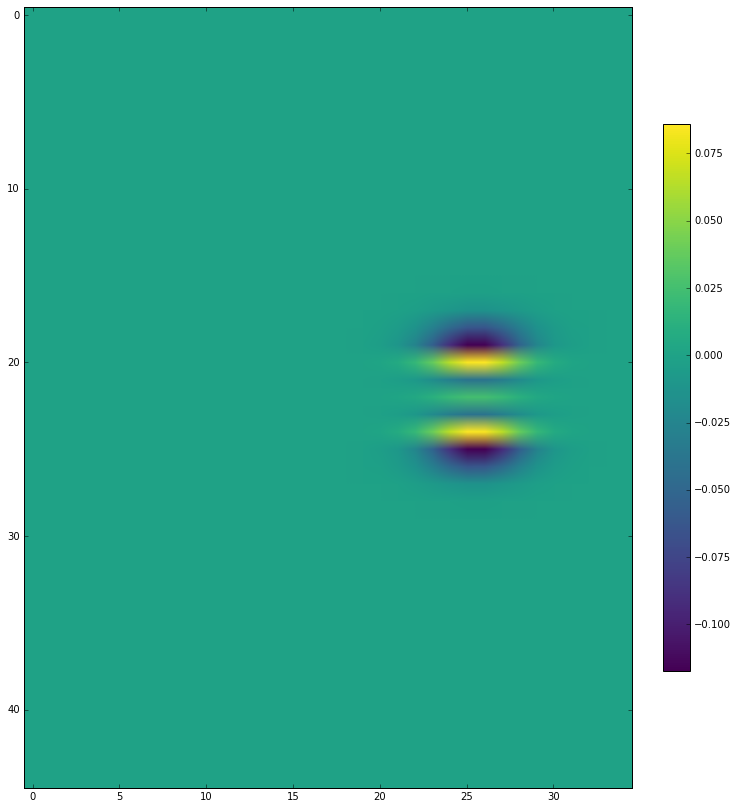

In [103]:
plt.figure(figsize=(14,14))
plt.imshow((evecs[:,11].reshape(zeropi_full.pm.varpts[0],zeropi_full.pm.varpts[1],zeropi_full.pm.varpts[2])[32,:,:]).T,cmap=cm.viridis)
# plt.imshow(abs(evecs[:,1].reshape(pm.varpts[0],pm.varpts[1],pm.varpts[2])[28,:,:]).T,cmap=cm.viridis)
plt.colorbar(fraction=0.035, pad=0.04)
plt.show()

Note: for the parameters chosen here (and similar to what the "ideal" 0-pi device should have), it is evident that spatial discretization is problematic for the $\chi$ degree of freedom. This degree is so low-energetic that it will acquire a large number of nodes/antinodes before other excitations occur. These nodes/antinodes will be densely spaced, going beyond the spatial discretization and hence causing errors (seen as deviations from equidistant spacing of energy levels for the case without disorder).

### No disorder

In [15]:
# parameters for the modified 0-\pi circuit
EJ_CONST  = 1/3.95
ECJ_CONST = 1/(8.0*EJ_CONST)
ECS_CONST = 10.0**(-3)

zeropi_full = qubit.QubitFullZeroPi(
    minmaxpts = [ 
        [-7*pi, 7*pi, 65],  # phi variable
        [-pi/2, 3*pi/2, 35], # theta variable (periodic!)
        # [-8*pi, 8*pi, 45]   # chi variable   
        [-10.0, 10.0, 70]
    ],
    EJ  = EJ_CONST,
    dEJ = 0.0,
    EL  = 10.0**(-3),
    dEL = 0.0,
    ECJ = ECJ_CONST,
    dCJ = 0.0,
    ECS = ECS_CONST,
    EC  = 1/(1/ECS_CONST-1/ECJ_CONST),
    dC  = 0.0,
    pext = 0
)

In [16]:
zeropi_full

Qubit parameters
_H	: None
_H_calculated	: False
_pm	: 
DEJ	: 0
DEL	: 0
EC	: 0.00100202942669
ECJ	: 0.49375
ECS	: 0.001
EJ	: 0.253164556962
EL	: 0.001
Hdim	: 125125
dC	: 0
dCJ	: 0
dim	: 3
pext	: 0
varmax	: [25.132741228718345, 4.71238898038469, 15.0]
varmin	: [-25.132741228718345, -1.5707963267948966, -15.0]
varpts	: [65, 35, 55]
_qubit_type	: full 0-Pi circuit (phi, theta, chi) with offset charge


Percent: [====================] 100.0% Done.


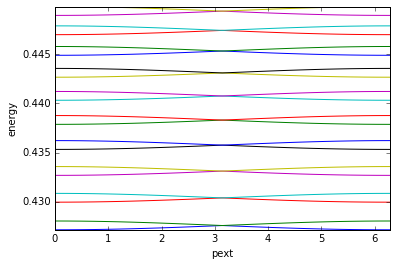

In [17]:
pext_list = np.linspace(0, 2*pi, 27)
zeropi_full.plot_evals_vs_paramvals('pext', pext_list, evnum=20, to_file="./data/0pifull_no_disorder_E_vs_pext")

In [18]:
evals, evecs = zeropi_full.eigensys(20, to_file="./data/0pi_no_disorder")

In [14]:
sqrt(8*pm.EC*pm.EL)

0.002831295712831086

## $0-\pi$ qubit with disorder in $E_J$ and $E_C$ ($\chi$ remains decoupled)

$H = H_\text{sym}
+4E_{C\Sigma}(\delta C_J/C_J)\partial_\phi\partial_\theta +2\,\delta E_J \sin\theta\sin(\phi-\phi_\text{ext}/2)$

In [3]:
# parameters
EJ_CONST = 1/3.95

zeropi_dis = qubit.QubitDisZeroPi(
    minmaxpts = [ 
        [-8*pi, 8*pi, 360],  # phi variable
        [-pi/2, 3*pi/2, 55] # theta variable (periodic!)
    ],
    EJ  = EJ_CONST,
    dEJ = 0.1,
    EL  = 10.0**(-3),
    ECJ = 1 / (8.0*EJ_CONST),
    dCJ = 0.1,
    ECS  = 10.0**(-3),
    pext = 0
)

In [4]:
zeropi_dis

Qubit parameters
ECJ	: 0.49375
ECS	: 0.001
EJ	: 0.253164556962
EL	: 0.001
Hdim	: 19800
_qubit_type	: 0-Pi qubit with EJ and CJ disorder, no coupling to chi mode (zero offset charge)
dCJ	: 0.1
dEJ	: 0.1
dim	: 2
minmaxpts	: [[-25.132741228718345, 25.132741228718345, 360], [-1.5707963267948966, 4.71238898038469, 55]]
pext	: 0
varmax	: [25.132741228718345, 4.71238898038469]
varmin	: [-25.132741228718345, -1.5707963267948966]
varpts	: [360, 55]

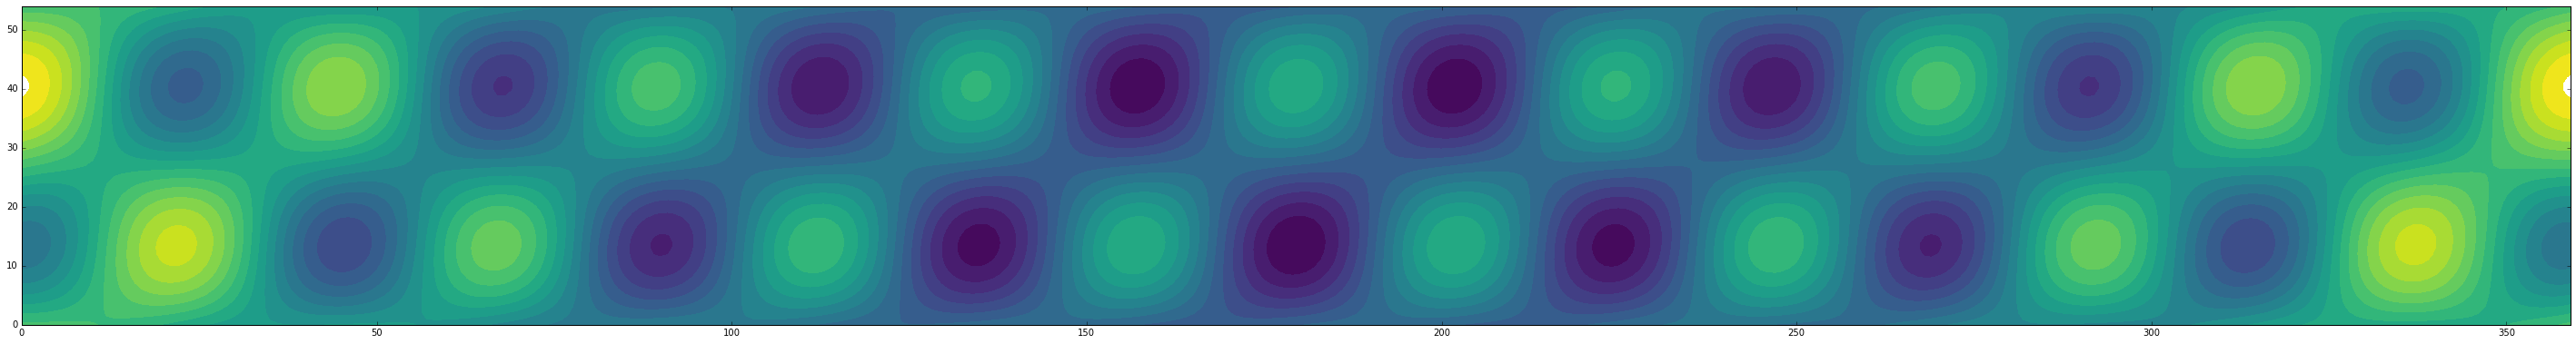

In [5]:
qubit.contourplot_potential(zeropi_dis.potential, zeropi_dis.pm, levls=linspace(0,1.63,20), varying_vars=[0,1], fixed_vals=[0.0])

In [6]:
evals = zeropi_dis.eigenvals(evnum=4)

In [7]:
evals

array([ 0.42766244,  0.42862447,  0.45615751,  0.45697364])


Percent: [====================] 100.0% Done.


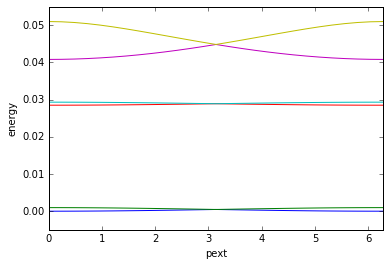

In [9]:
pext_list = np.linspace(0, 2*pi, 27)
zeropi_dis.plot_evals_vs_paramvals('pext', pext_list, shift=-evals[0], yrange=[-0.005,0.055], to_file="./data/0pi_dis_E_vs_pext")

In [8]:
evals, evecs = zeropi_dis.eigensys()

In [9]:
qubit.matrix_element(evecs[:,0], zeropi_dis.phi(), evecs[:,2])

0.00803643582128717

Note: as soon as $E_J$ disorder is included, the potential is not perfectly symmetric w.r.t. $\phi=0$ anymore, so small matrix elements between same-rung wavefunctions with nominally same parity are to be expected.

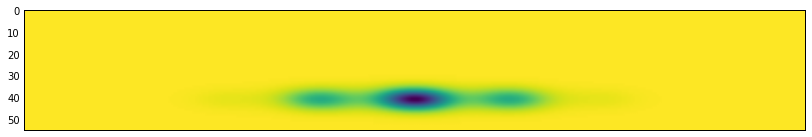

In [10]:
pm = zeropi_dis.pm

plt.figure(figsize=(14,14))
plt.imshow((evecs[:,0].reshape(pm.varpts[0],pm.varpts[1])).T,cmap=cm.viridis)
plt.tick_params(
    axis='both',
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    left='off',
    right='off',
    labelbottom='off') # labels along the bottom edge are off
plt.show()

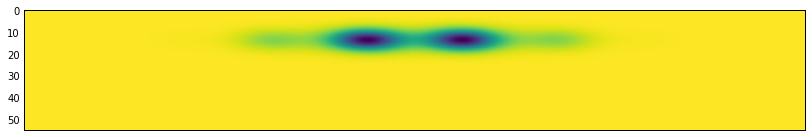

In [11]:
plt.figure(figsize=(14,14))
plt.imshow((evecs[:,1].reshape(pm.varpts[0],pm.varpts[1])).T,cmap=cm.viridis)
plt.tick_params(
    axis='both',
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    left='off',
    right='off',
    labelbottom='off') # labels along the bottom edge are off
plt.show()

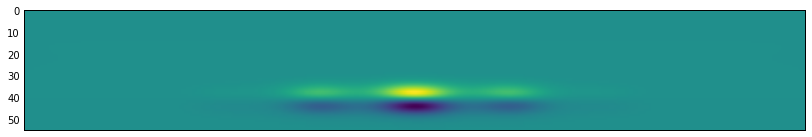

In [12]:
plt.figure(figsize=(14,14))
plt.imshow((evecs[:,2].reshape(pm.varpts[0],pm.varpts[1])).T,cmap=cm.viridis)
plt.tick_params(
    axis='both',
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    left='off',
    right='off',
    labelbottom='off') # labels along the bottom edge are off
plt.show()

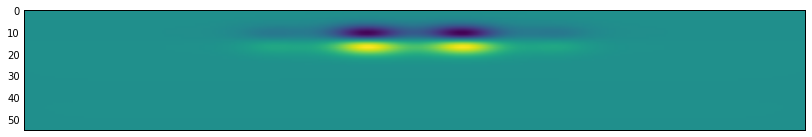

In [21]:
plt.figure(figsize=(14,14))
plt.imshow((evecs[:,3].reshape(pm.varpts[0],pm.varpts[1])).T,cmap=cm.viridis)
plt.tick_params(
    axis='both',
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    left='off',
    right='off',
    labelbottom='off') # labels along the bottom edge are off
plt.show()

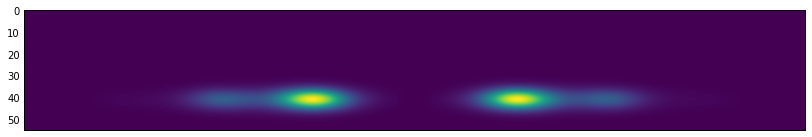

In [22]:
plt.figure(figsize=(14,14))
plt.imshow(-((zeropi_dis.phi()).dot(evecs[:,5]).reshape(pm.varpts[0],pm.varpts[1])).T,cmap=cm.viridis)
plt.tick_params(
    axis='both',
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    left='off',
    right='off',
    labelbottom='off') # labels along the bottom edge are off
plt.show()

In [16]:
np.dot(evecs[:,5],evecs[:,1])

-1.5880439363455192e-15

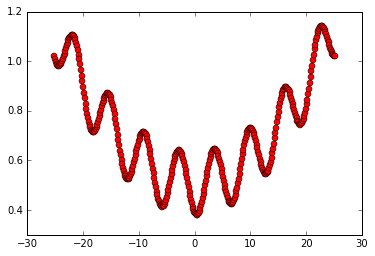

In [14]:
phi_list = linspace(pm.varmin[0], pm.varmax[0], pm.varpts[0])
theta_list = linspace(pm.varmin[1], pm.varmax[1], pm.varpts[1])

plt.plot(phi_list,zeropi_dis.potential(phi_list, theta_list[25]),'ro')
plt.show()


Table of matrix elements $\langle n | \phi |m \rangle$

In [15]:
pm.pext = 1.5
ev_nr = 10
# evals, evecs = zeropi_dis.eigensys(evnum=ev_nr, to_file="./data/0Pi_dis_pext1.5")
evals, evecs = zeropi_dis.eigensys(evnum=ev_nr)

In [16]:
phi_melements = qubit.matrixelem_table(zeropi_dis.phi(), evecs)

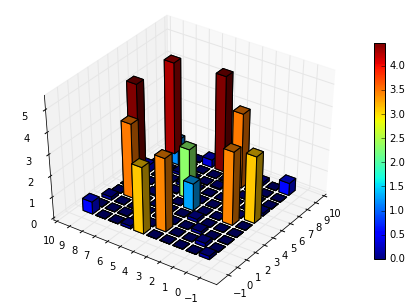

In [17]:
from mpl_toolkits.mplot3d import Axes3D

num_elem = ev_nr**2 #num. of elements to plot
xpos,ypos=meshgrid(range(ev_nr),range(ev_nr))
xpos=xpos.T.flatten()-0.5 #center bars on integer value of x-axis
ypos=ypos.T.flatten()-0.5 #center bars on integer value of y-axis
zpos = zeros(num_elem) #all bars start at z=0
dx =0.75*ones(num_elem) #width of bars in x-direction
dy = dx.copy() #width of bars in y-direction (same as x-dir here)
dz = abs(phi_melements).flatten() #height of bars from density matrix elements (should use 'real()' if complex)

nrm=mpl.colors.Normalize(0,max(dz)) #<-- normalize colors to max. data
# nrm=mpl.colors.Normalize(0,1) #<-- normalize colors to 1
colors=cm.jet(nrm(dz)) #list of colors for each bar

#plot figure
fig = plt.figure(figsize=[6,4])
ax = Axes3D(fig,azim=215,elev=40)
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors)
ax.axes.w_xaxis.set_major_locator(IndexLocator(1,-0.5)) #set x-ticks to integers
ax.axes.w_yaxis.set_major_locator(IndexLocator(1,-0.5)) #set y-ticks to integers
ax.axes.w_zaxis.set_major_locator(IndexLocator(1,0)) #set z-ticks to integers
ax.set_zlim3d([0,5.5])

cax,kw=mpl.colorbar.make_axes(ax,shrink=.75,pad=.02) #add colorbar with normalized range
cb1=mpl.colorbar.ColorbarBase(cax,cmap=cm.jet,norm=nrm)

plt.show()
close(fig)

In [18]:
idtheta_melements = qubit.matrixelem_table(zeropi_dis.i_d_dtheta(), evecs)

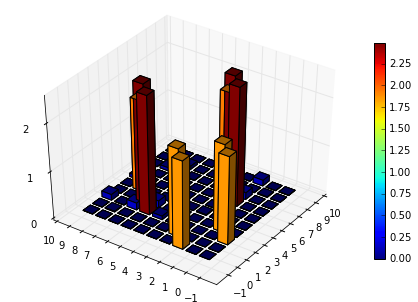

In [19]:
from mpl_toolkits.mplot3d import Axes3D

num_elem = ev_nr**2 #num. of elements to plot
xpos,ypos=meshgrid(range(ev_nr),range(ev_nr))
xpos=xpos.T.flatten()-0.5 #center bars on integer value of x-axis
ypos=ypos.T.flatten()-0.5 #center bars on integer value of y-axis
zpos = zeros(num_elem) #all bars start at z=0
dx =0.75*ones(num_elem) #width of bars in x-direction
dy = dx.copy() #width of bars in y-direction (same as x-dir here)
dz = abs(idtheta_melements).flatten() #height of bars from density matrix elements (should use 'real()' if complex)

nrm=mpl.colors.Normalize(0,max(dz)) #<-- normalize colors to max. data
# nrm=mpl.colors.Normalize(0,1) #<-- normalize colors to 1
colors=cm.jet(nrm(dz)) #list of colors for each bar

#plot figure
fig = plt.figure(figsize=[6,4])
ax = Axes3D(fig,azim=215,elev=40)
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors)
ax.axes.w_xaxis.set_major_locator(IndexLocator(1,-0.5)) #set x-ticks to integers
ax.axes.w_yaxis.set_major_locator(IndexLocator(1,-0.5)) #set y-ticks to integers
ax.axes.w_zaxis.set_major_locator(IndexLocator(1,0)) #set z-ticks to integers
ax.set_zlim3d([0,2.5])

cax,kw=mpl.colorbar.make_axes(ax,shrink=.75,pad=.02) #add colorbar with normalized range
cb1=mpl.colorbar.ColorbarBase(cax,cmap=cm.jet,norm=nrm)

plt.show()
close(fig)

In [71]:
DEL = pm.EL * 0.05
dC = 0.05
EC   = 1/(1/pm.ECS-1/pm.ECJ)

def gphi(l1, l2):
    return (DEL * (8.0 * EC / pm.EL)**0.25 * phi_melements[l1,l2])

def gtheta(l1, l2):
    return (pm.ECS * dC * (32.0 * pm.EL / EC)**0.25 * idtheta_melements[l1,l2])

def g_mat(l1, l2):
    return (gphi(l1,l2) + 1j * gtheta(l1, l2))

In [72]:
gtheta(0,0)

-2.1918419598581502e-21j

In [73]:
g_mat(0,0)

(-7.8835039118604453e-15+0j)

In [74]:
g_melements = np.empty(shape=[ev_nr,ev_nr], dtype=np.complex_)
for i in range(ev_nr):
    for j in range(ev_nr):
        g_melements[i,j] = g_mat(i,j)

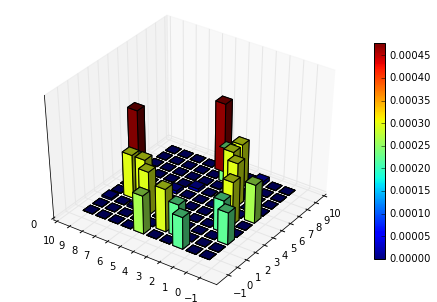

In [75]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_pdf import PdfPages

num_elem = ev_nr**2 #num. of elements to plot
xpos,ypos=meshgrid(range(ev_nr),range(ev_nr))
xpos=xpos.T.flatten()-0.5 #center bars on integer value of x-axis
ypos=ypos.T.flatten()-0.5 #center bars on integer value of y-axis
zpos = zeros(num_elem) #all bars start at z=0
dx =0.75*ones(num_elem) #width of bars in x-direction
dy = dx.copy() #width of bars in y-direction (same as x-dir here)
dz = abs(g_melements).flatten() #height of bars from density matrix elements (should use 'real()' if complex)

nrm=mpl.colors.Normalize(0,max(dz)) #<-- normalize colors to max. data
# nrm=mpl.colors.Normalize(0,1) #<-- normalize colors to 1
colors=cm.jet(nrm(dz)) #list of colors for each bar

#plot figure
fig = plt.figure(figsize=[6,4])
ax = Axes3D(fig,azim=215,elev=40)
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors)
ax.axes.w_xaxis.set_major_locator(IndexLocator(1,-0.5)) #set x-ticks to integers
ax.axes.w_yaxis.set_major_locator(IndexLocator(1,-0.5)) #set y-ticks to integers
ax.axes.w_zaxis.set_major_locator(IndexLocator(1,0)) #set z-ticks to integers
ax.set_zlim3d([0,0.0008])

cax,kw=mpl.colorbar.make_axes(ax,shrink=.75,pad=.02) #add colorbar with normalized range
cb1=mpl.colorbar.ColorbarBase(cax,cmap=cm.jet,norm=nrm)

out_file = PdfPages("./data/g_coupling_pext1.5.pdf")
out_file.savefig()
out_file.close()
plt.show()
close(fig)

In [76]:
evals

array([ 0.4993939 ,  0.49915095,  0.48309311,  0.48238228,  0.47864407,
        0.46846217,  0.45697364,  0.45615751,  0.42862447,  0.42766244])